# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import gdown

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# ***DATASET***

## ***Dataset* Film**

In [ ]:
'''https://drive.google.com/file/d/17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl/view?usp=sharing'''

id = "17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl"
gdown.download(id=id, output="imdb.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl
To: /content/imdb.csv
100%|██████████| 1.54M/1.54M [00:00<00:00, 140MB/s]


'imdb.csv'

In [ ]:
df_film = pd.read_csv("imdb.csv")
df_film.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
df_film

,type,name,url,poster,description,review,IMDB,contentRating,genre,datePublished,keywords,duration,actor,director,creator,RottenTomatoes Audience Score,RottenTomatoes Tomato Meter
0,Movie,14 Cameras,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,When a family of five rent a beautiful house f...,"{'author': 'aprilsfriendorin', 'dateCreated': ...",2.30,TV-MA,"['Crime', 'Horror', 'Thriller']",2018-07-27,"tied feet,tied up while barefoot,tape over mou...",PT1H30M,"[{'name': 'Zach Dulin', 'url': 'https://www.im...","[{'name': 'Seth Fuller', 'url': 'https://www.i...","[{'name': 'Victor Zarcoff', 'url': 'https://ww...",1.10,1.10
1,Movie,17 Again,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,0,"{'author': 'tavm', 'dateCreated': '2009-04-21'...",3.20,PG-13,"['Comedy', 'Drama', 'Fantasy']",2009-04-17,"body transformation,adult as child,high school...",PT1H42M,"[{'name': 'Zac Efron', 'url': 'https://www.imd...","[{'name': 'Burr Steers', 'url': 'https://www.i...","[{'name': 'Jason Filardi', 'url': 'https://www...",3.35,2.80
2,Movie,1BR,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNDgxY2...,0,"{'author': 'aarpcats', 'dateCreated': '2022-01...",2.90,TV-MA,"['Drama', 'Horror', 'Thriller']",2020-04-24,"community,apartment building,submission,stockh...",PT1H30M,"[{'name': 'Nicole Brydon Bloom', 'url': 'https...","[{'name': 'David Marmor', 'url': 'https://www....","[{'name': 'David Marmor', 'url': 'https://www....",2.65,4.40
3,Movie,3 Days to Kill,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BYjE2Nm...,A dying CIA agent trying to reconnect with his...,"{'author': 'slightlymad22', 'dateCreated': '20...",3.10,PG-13,"['Action', 'Comedy', 'Drama']",2014-02-25,"spy,violence,dirty bomb,massacre,cough syrup",PT1H57M,"[{'name': 'Kevin Costner', 'url': 'https://www...","[{'name': 'McG', 'url': 'https://www.imdb.com/...","[{'name': 'Adi Hasak', 'url': 'https://www.imd...",2.15,1.40
4,Movie,3 Idiots,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNTkyOG...,0,"{'author': 'lanacastillo49', 'dateCreated': '2...",4.20,13+,"['Comedy', 'Drama']",2009-12-25,"hairy chest,motivation,coming of age,against t...",PT2H50M,"[{'name': 'Aamir Khan', 'url': 'https://www.im...","[{'name': 'Rajkumar Hirani', 'url': 'https://w...","[{'name': 'Abhijat Joshi', 'url': 'https://www...",4.65,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Movie,Zombieland,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjIzND...,0,"{'author': 'Fella_shibby', 'dateCreated': '201...",3.80,D,"['Action', 'Comedy', 'Horror']",2009-10-02,"zombie,amusement park,human versus zombie,zomb...",PT1H28M,"[{'name': 'Jesse Eisenberg', 'url': 'https://w...","[{'name': 'Ruben Fleischer', 'url': 'https://w...","[{'name': 'Rhett Reese', 'url': 'https://www.i...",4.30,4.45
850,Movie,iNumber Number: Jozi Gold,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BM2RhYz...,When an undercover cop is tasked with investig...,"{'author': 'penofinspiratin', 'dateCreated': '...",2.20,0,"['Action', 'Adventure', 'Crime']",2023-06-23,"police procedural crime,team action",PT1H53M,"[{'name': 'Lonwabo Bokamoso', 'url': 'https://...","[{'name': 'Donovan Marsh', 'url': 'https://www...","[{'name': 'Donovan Marsh', 'url': 'https://www...",0.00,0.00
851,Movie,¡Que viva México!,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMDFiMD...,0,"{'author': 'cobo-3', 'dateCreated': '2023-03-2...",2.75,R,['Comedy'],2023-03-23,"female full frontal nudity,female nudity,femal...",PT3H11M,"[{'name': 'Damián Alcázar', 'url': 'https://ww...","[{'name': 'Luis Estrada', 'url': 'https://www....","[{'name': 'Luis Estrada', 'url': 'https://www....",0.00,1.45
852,Movie,¿Enco

## ***Dataset Rating***


In [ ]:
'''https://drive.google.com/file/d/1s2nOh7vLEBW4dac_GaIHZgnPDbO_77oT/view?usp=sharing'''

id = "1s2nOh7vLEBW4dac_GaIHZgnPDbO_77oT"
gdown.download(id=id, output="cnn-lstm_sentiment_scores.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1s2nOh7vLEBW4dac_GaIHZgnPDbO_77oT
To: /content/cnn-lstm_sentiment_scores.csv
100%|██████████| 5.45M/5.45M [00:00<00:00, 64.8MB/s]


'cnn-lstm_sentiment_scores.csv'

In [ ]:
df_rating = pd.read_csv("cnn-lstm_sentiment_scores.csv")
df_rating

,title,username,Text,Sentiment,label,sentiment_score
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,2,4.824663
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,1,4.726262
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1,3.680577
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,1,3.804186
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,1,4.791606
...,...,...,...,...,...,...
33131,Rise,zavvi,the droids hold a special place in my heart an...,Positive,2,4.718651
33132,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,2,4.583235
33133,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Negative,0,4.165523
33134,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Positive,2,2.911942


In [ ]:
df_rating.describe()

,label,sentiment_score
count,33136.000000,33136.000000
mean,1.025290,3.971673
std,0.971214,0.688059
min,0.000000,1.009004
25%,0.000000,3.653059
50%,1.000000,4.112174
75%,2.000000,4.473290
max,2.000000,4.990386


# ***PRE-PROCESSING DATASET RATING***

## ***Detect Outliers***

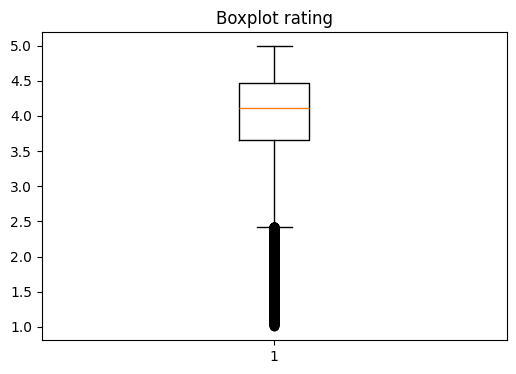

Outlier values:
33       1.856808
83       1.195830
126      1.150210
230      1.501699
254      1.347039
           ...   
32995    1.760567
33002    1.760567
33022    1.760567
33026    1.760567
33041    1.875753
Name: sentiment_score, Length: 529, dtype: float64


In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_rating["sentiment_score"])
plt.title(f'Boxplot {"rating"}')
plt.show()

z_scores = stats.zscore(df_rating["sentiment_score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_rating["sentiment_score"][outliers]

print("Outlier values:")
print(outlier_values)

## ***Set Columns***

In [ ]:
df_rating = df_rating.rename(columns={'username': 'nama_akun'})
df_rating = df_rating.rename(columns={'title': 'judul_film'})
df_rating = df_rating.rename(columns={'sentiment_score': 'rating'})

## ***Missing Value***

In [ ]:
print(df_rating.isnull().sum())

judul_film    0
nama_akun     0
Text          0
Sentiment     0
label         0
rating        0
dtype: int64


In [ ]:
df_rating

,judul_film,nama_akun,Text,Sentiment,label,rating
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,2,4.824663
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,1,4.726262
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1,3.680577
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,1,3.804186
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,1,4.791606
...,...,...,...,...,...,...
33131,Rise,zavvi,the droids hold a special place in my heart an...,Positive,2,4.718651
33132,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,2,4.583235
33133,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Negative,0,4.165523
33134,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Positive,2,2.911942


# ***TEMPLATE DATASET***

## ***Dataset* Kosong**

Berisi kolom yang akan diisi untuk hasil prediksi *rating* sistem rekomendasi.

In [ ]:
columns = []
columns.append('nama film')
accounts = df_rating.nama_akun.unique()
for account_index in range (0, len(accounts)):
  columns.append(accounts[account_index])

data_entries = []
films = df_film.name
for film_index in range (0, len(films)):
  data_entries.append({'nama film' : films[film_index]})

In [ ]:
df = pd.DataFrame(columns=columns)
df = pd.concat([df, pd.DataFrame(data_entries)], ignore_index=True)
df.fillna(0, inplace=True)

## ***Merging Dataset***

Penggabungan kolom pada *dataset* dengan cara mengambil data nama akun dan judul film sebagai kolom, serta *rating* sebagai *value*.

In [ ]:
for rating_index in range(len(df_rating)):
    df[df_rating["nama_akun"][rating_index]].loc[df["nama film"] == df_rating["judul_film"][rating_index]] = round(df_rating["rating"][rating_index],2)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,14 Cameras,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,17 Again,2.70,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,4.12,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,1BR,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,4.04,0.0,0.0,0.0,0.0
3,3 Days to Kill,0.00,0.0,0.00,0.0,4.89,4.96,3.82,0.00,0.0,...,0.00,3.23,0.0,0.0,4.06,0.00,0.0,0.0,0.0,0.0
4,3 Idiots,3.61,0.0,4.08,0.0,0.00,0.00,4.36,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Zombieland,4.40,0.0,4.79,0.0,2.57,3.58,3.75,2.14,0.0,...,4.31,4.23,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
850,iNumber Number: Jozi Gold,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
851,¡Que viva México!,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
852,¿Encontró lo que buscaba?,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


# ***DATASET* SIAP OLAH**

## ***Sparsity Data***

Sparse data merujuk pada situasi di mana sebagian besar nilai dalam suatu dataset adalah nol

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 29781
Persentase sparsity: 89.42%


In [ ]:
def cek_nilai_nol(row):
    return len([value for value in row if value != 0])

df['Nilai Nol'] = df.apply(cek_nilai_nol, axis=1)
df_film['Nilai Nol'] = df['Nilai Nol']

df = df[df['Nilai Nol'] > 5]
df_film = df_film[df_film['Nilai Nol'] > 5]

df = df.drop('Nilai Nol', axis=1)
df = df.reset_index(drop=True)

df_film = df_film.drop('Nilai Nol', axis=1)
df_film = df_film.reset_index(drop=True)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.00,0.00,0.00,0.00,4.89,4.96,3.82,0.00,0.00,...,0.00,3.23,0.00,0.00,4.06,0.00,0.00,0.00,0.00,0.00
1,3 Idiots,3.61,0.00,4.08,0.00,0.00,0.00,4.36,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,5 Cowok Jagoan,0.00,3.74,0.00,0.00,0.00,3.53,4.93,3.84,0.00,...,0.00,0.00,0.00,0.00,0.00,3.98,0.00,0.00,0.00,0.00
3,6 Underground,4.22,4.05,0.00,0.00,3.13,4.36,0.00,3.66,0.00,...,0.00,2.76,0.00,0.00,0.00,2.96,0.00,0.00,0.00,0.00
4,65,4.36,1.38,4.86,2.77,4.75,4.86,3.68,3.22,3.64,...,4.87,4.54,4.88,3.84,4.04,3.39,4.06,0.00,4.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,3.71,0.00,0.00,1.26,0.00,0.00,0.00,0.00,4.63,...,0.00,0.00,0.00,3.60,0.00,0.00,2.27,0.00,0.00,2.83
271,Young Adult,0.00,0.00,0.00,0.00,0.00,4.80,4.65,4.71,0.00,...,0.00,4.20,0.00,0.00,4.29,0.00,0.00,0.00,0.00,0.00
272,Your Place or Mine,3.80,0.00,0.00,3.51,0.00,0.00,0.00,0.00,4.04,...,0.00,0.00,0.00,0.00,0.00,4.02,1.17,0.00,0.00,0.00
273,Zodiac,3.90,0.00,4.78,0.00,0.00,4.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.69,0.00,0.00


In [ ]:
# cek setelah di drop beberapa film
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 7709
Persentase sparsity: 71.88%


## ***Data Normalization***

Menggunakan ***Min-Max Scaler*** untuk mengubah nilai-nilai dalam suatu fitur (*variabel*) sehingga rentang nilainya antara 0 hingga 1. Guna menghindari bias yang dapat timbul jika beberapa fitur memiliki skala yang jauh berbeda dalam data.

In [ ]:
df_normalized = df.copy()

scaler = MinMaxScaler()
columns = df.columns[1:]
df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

df_normalized

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000000,0.000000,0.000000,0.000000,0.987879,1.000000,0.770161,0.000000,0.000000,...,0.000000,0.653846,0.0,0.000000,0.837113,0.000000,0.000000,0.000000,0.000000,0.00000
1,3 Idiots,0.739754,0.000000,0.820926,0.000000,0.000000,0.000000,0.879032,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,5 Cowok Jagoan,0.000000,0.761711,0.000000,0.000000,0.000000,0.711694,0.993952,0.783673,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.830898,0.000000,0.000000,0.000000,0.00000
3,6 Underground,0.864754,0.824847,0.000000,0.000000,0.632323,0.879032,0.000000,0.746939,0.000000,...,0.000000,0.558704,0.0,0.000000,0.000000,0.617954,0.000000,0.000000,0.000000,0.00000
4,65,0.893443,0.281059,0.977867,0.560729,0.959596,0.979839,0.741935,0.657143,0.763103,...,0.997951,0.919028,1.0,0.788501,0.832990,0.707724,0.830266,0.000000,0.818737,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.760246,0.000000,0.000000,0.255061,0.000000,0.000000,0.000000,0.000000,0.970650,...,0.000000,0.000000,0.0,0.739220,0.000000,0.000000,0.464213,0.000000,0.000000,0.65358
271,Young Adult,0.000000,0.000000,0.000000,0.000000,0.000000,0.967742,0.937500,0.961224,0.000000,...,0.000000,0.850202,0.0,0.000000,0.884536,0.000000,0.000000,0.000000,0.000000,0.00000
272,Your Place or Mine,0.778689,0.000000,0.000000,0.710526,0.000000,0.000000,0.000000,0.000000,0.846960,...,0.000000,0.000000,0.0,0.000000,0.000000,0.839248,0.239264,0.000000,0.000000,0.00000
273,Zodiac,0.799180,0.000000,0.961771,0.000000,0.000000,0.907258,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.555785,0.000000,0.00000


## ***Transposing Dataset***

In [ ]:
df_transposed = df_normalized.set_index('nama film').T
df_transposed

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.739754,0.000000,0.864754,0.893443,0.358607,0.946721,0.729508,0.844262,0.000000,...,0.680328,0.672131,0.821721,0.827869,0.567623,0.760246,0.000000,0.778689,0.799180,0.901639
bicaraboxoffice,0.000000,0.000000,0.761711,0.824847,0.281059,0.000000,0.000000,0.505092,0.000000,0.802444,...,0.692464,0.822811,0.716904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.820926,0.000000,0.000000,0.977867,0.000000,0.000000,0.919517,0.000000,0.000000,...,0.752515,0.949698,0.000000,0.000000,0.867203,0.000000,0.000000,0.000000,0.961771,0.963783
ErikDavis,0.000000,0.000000,0.000000,0.000000,0.560729,0.000000,0.000000,0.894737,0.000000,0.000000,...,0.000000,0.694332,0.000000,0.000000,0.000000,0.255061,0.000000,0.710526,0.000000,0.000000
arulfittron,0.987879,0.000000,0.000000,0.632323,0.959596,0.000000,0.802020,0.000000,0.000000,0.963636,...,0.000000,0.000000,0.000000,0.000000,0.868687,0.000000,0.000000,0.000000,0.000000,0.519192
GilaFilmID,1.000000,0.000000,0.711694,0.879032,0.979839,0.000000,0.000000,0.828629,0.540323,0.961694,...,0.909274,0.907258,0.939516,0.901210,0.000000,0.000000,0.967742,0.000000,0.907258,0.721774
TarizSolis,0.770161,0.879032,0.993952,0.000000,0.741935,0.000000,0.000000,0.959677,0.606855,0.895161,...,0.798387,0.000000,0.929435,0.000000,0.000000,0.000000,0.937500,0.000000,0.000000,0.756048
djaycoholyc,0.000000,0.000000,0.783673,0.746939,0.657143,0.422449,0.000000,0.551020,0.804082,0.797959,...,0.000000,0.895918,0.967347,0.000000,0.891837,0.000000,0.961224,0.000000,0.000000,0.436735
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.763103,0.000000,0.000000,0.918239,0.000000,0.000000,...,0.000000,0.796646,0.000000,0.000000,0.000000,0.970650,0.000000,0.846960,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.938017,0.000000,0.000000,...,0.830579,0.971074,0.000000,0.000000,0.000000,0.818182,0.000000,0.793388,0.000000,0.000000


In [ ]:
# # dataset siap olah
# df_transposed.to_excel("Dataset_Siap_Olah.xlsx", index=True)

# **DISTRIBUSI DATA**

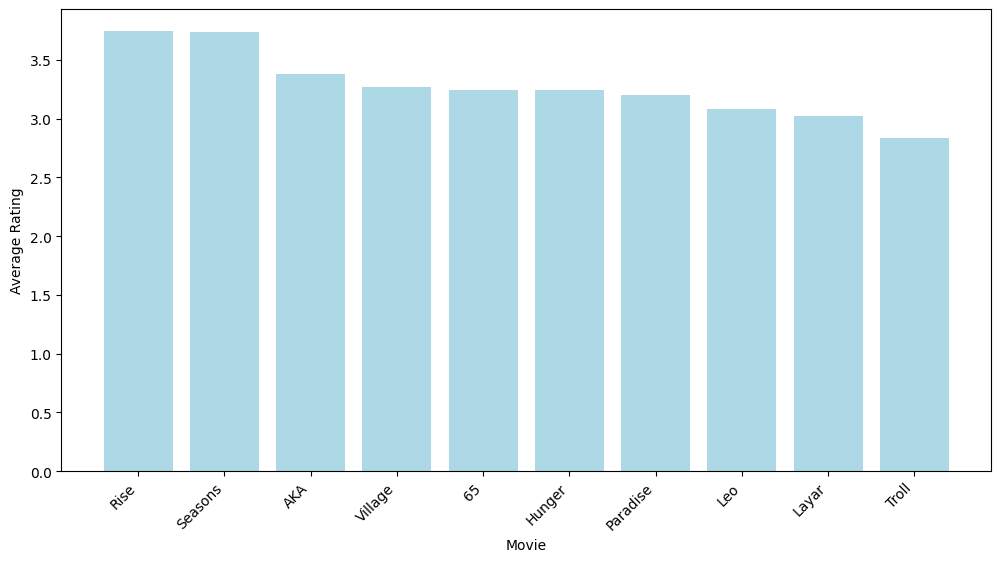

In [ ]:
data = df.copy()
# data = data.replace(0, np.NAN)

data["average"] = data.iloc[:, 1:].mean(axis=1)
data = data.sort_values("average", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data["nama film"][:10], data["average"][:10], color='lightblue')
plt.xlabel("Movie")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

# ***COLLABORATIVE FILTERING***

In [ ]:
df_cf = df_transposed.copy()
df_cf

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.739754,0.000000,0.864754,0.893443,0.358607,0.946721,0.729508,0.844262,0.000000,...,0.680328,0.672131,0.821721,0.827869,0.567623,0.760246,0.000000,0.778689,0.799180,0.901639
bicaraboxoffice,0.000000,0.000000,0.761711,0.824847,0.281059,0.000000,0.000000,0.505092,0.000000,0.802444,...,0.692464,0.822811,0.716904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.820926,0.000000,0.000000,0.977867,0.000000,0.000000,0.919517,0.000000,0.000000,...,0.752515,0.949698,0.000000,0.000000,0.867203,0.000000,0.000000,0.000000,0.961771,0.963783
ErikDavis,0.000000,0.000000,0.000000,0.000000,0.560729,0.000000,0.000000,0.894737,0.000000,0.000000,...,0.000000,0.694332,0.000000,0.000000,0.000000,0.255061,0.000000,0.710526,0.000000,0.000000
arulfittron,0.987879,0.000000,0.000000,0.632323,0.959596,0.000000,0.802020,0.000000,0.000000,0.963636,...,0.000000,0.000000,0.000000,0.000000,0.868687,0.000000,0.000000,0.000000,0.000000,0.519192
GilaFilmID,1.000000,0.000000,0.711694,0.879032,0.979839,0.000000,0.000000,0.828629,0.540323,0.961694,...,0.909274,0.907258,0.939516,0.901210,0.000000,0.000000,0.967742,0.000000,0.907258,0.721774
TarizSolis,0.770161,0.879032,0.993952,0.000000,0.741935,0.000000,0.000000,0.959677,0.606855,0.895161,...,0.798387,0.000000,0.929435,0.000000,0.000000,0.000000,0.937500,0.000000,0.000000,0.756048
djaycoholyc,0.000000,0.000000,0.783673,0.746939,0.657143,0.422449,0.000000,0.551020,0.804082,0.797959,...,0.000000,0.895918,0.967347,0.000000,0.891837,0.000000,0.961224,0.000000,0.000000,0.436735
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.763103,0.000000,0.000000,0.918239,0.000000,0.000000,...,0.000000,0.796646,0.000000,0.000000,0.000000,0.970650,0.000000,0.846960,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.938017,0.000000,0.000000,...,0.830579,0.971074,0.000000,0.000000,0.000000,0.818182,0.000000,0.793388,0.000000,0.000000


## **Fungsi Mencari Rata-Rata dan Top N**

In [ ]:
# menghitung rata-rata
def average(df, film_name):
    """Calculates the average rating for a given film in a transposed DataFrame."""
    if film_name in df.columns:
        ratings = df[film_name]
        # Filter out non-zero ratings
        valid_ratings = ratings[ratings != 0]
        if not valid_ratings.empty:
            return round(valid_ratings.mean(), 2)
    return 0

In [ ]:
# mencari top n
def top_n(n, df, col):
    top_values = df[col].nlargest(n)
    return top_values

# ***USER-BASED***

In [ ]:
print(df_transposed.columns)

Index(['3 Days to Kill', '3 Idiots', '5 Cowok Jagoan', '6 Underground', '65',
       'A Classic Horror Story', 'A Ghost Story', 'A Man Called Otto',
       'A Perfect Fit', 'A Wrinkle in Time',
       ...
       'Weathering', 'What If', 'Why Do You Love Me', 'Wind River',
       'Wish Dragon', 'You People', 'Young Adult', 'Your Place or Mine',
       'Zodiac', 'Zombieland'],
      dtype='object', name='nama film', length=275)


In [ ]:
user_based_df = df_normalized.copy()
temp = df_transposed
target = df_cf.copy()

for i in range(len(user_based_df)):
    for j in range(len(temp.index)): # Corrected: Iterate over the index of temp
        if (user_based_df[temp.index[j]][i] != 0): # Corrected: Access movie name from the index
            user_based_df[temp.index[j]][i] -= average(target,user_based_df['nama film'][i])
user_based_df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000000,0.000000,0.000000,0.000000,0.137879,0.150000,-0.079839,0.000000,0.000000,...,0.000000,-0.196154,0.00,0.000000,-0.012887,0.000000,0.000000,0.000000,0.000000,0.00000
1,3 Idiots,-0.030246,0.000000,0.050926,0.000000,0.000000,0.000000,0.109032,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,5 Cowok Jagoan,0.000000,-0.088289,0.000000,0.000000,0.000000,-0.138306,0.143952,-0.066327,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,-0.019102,0.000000,0.000000,0.000000,0.00000
3,6 Underground,0.174754,0.134847,0.000000,0.000000,-0.057677,0.189032,0.000000,0.056939,0.000000,...,0.000000,-0.131296,0.00,0.000000,0.000000,-0.072046,0.000000,0.000000,0.000000,0.00000
4,65,0.113443,-0.498941,0.197867,-0.219271,0.179596,0.199839,-0.038065,-0.122857,-0.016897,...,0.217951,0.139028,0.22,0.008501,0.052990,-0.072276,0.050266,0.000000,0.038737,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,-0.019754,0.000000,0.000000,-0.524939,0.000000,0.000000,0.000000,0.000000,0.190650,...,0.000000,0.000000,0.00,-0.040780,0.000000,0.000000,-0.315787,0.000000,0.000000,-0.12642
271,Young Adult,0.000000,0.000000,0.000000,0.000000,0.000000,0.087742,0.057500,0.081224,0.000000,...,0.000000,-0.029798,0.00,0.000000,0.004536,0.000000,0.000000,0.000000,0.000000,0.00000
272,Your Place or Mine,0.008689,0.000000,0.000000,-0.059474,0.000000,0.000000,0.000000,0.000000,0.076960,...,0.000000,0.000000,0.00,0.000000,0.000000,0.069248,-0.530736,0.000000,0.000000,0.00000
273,Zodiac,-0.030820,0.000000,0.131771,0.000000,0.000000,0.077258,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,-0.274215,0.000000,0.00000


## ***Cosine Similarity***

In [ ]:
# Mengambil kolom dengan nilai-nilai rating
rating_matrix2 = user_based_df.iloc[:, 1:]
sim_user = cosine_similarity(rating_matrix2.T)

sim_user_cs = pd.DataFrame(sim_user, index=user_based_df.iloc[:, 1:].columns, columns=user_based_df.iloc[:, 1:].columns)
sim_user_cs

,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,slashfilm,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
moviemenfes,1.000000,-0.011025,-0.130783,-0.012507,-0.085376,-0.033121,-0.099985,0.050752,-0.111786,-0.066873,...,-0.034657,-0.100309,0.065593,-0.009481,-0.168026,-0.087979,-0.007999,0.047053,-0.003753,-0.092224
bicaraboxoffice,-0.011025,1.000000,-0.189300,0.061679,-0.094515,-0.008131,-0.070402,0.045556,-0.012327,-0.098510,...,-0.119113,-0.192222,-0.058378,-0.008858,0.025627,-0.137141,0.008423,0.039754,-0.063992,-0.002907
WatchmenID,-0.130783,-0.189300,1.000000,-0.000966,-0.038239,-0.012264,-0.114227,-0.120772,-0.037089,0.061913,...,0.042063,0.004889,0.007390,-0.008832,0.073913,-0.005850,0.046900,-0.000722,-0.120401,0.026149
ErikDavis,-0.012507,0.061679,-0.000966,1.000000,-0.028490,-0.138003,-0.064209,0.000180,-0.160112,-0.091991,...,-0.085039,-0.014468,-0.041199,-0.139679,-0.010928,0.005448,0.338945,0.000000,-0.001731,0.406156
arulfittron,-0.085376,-0.094515,-0.038239,-0.028490,1.000000,0.068737,-0.059041,-0.034044,-0.034525,-0.028854,...,-0.021547,-0.106587,-0.012875,-0.021344,-0.052414,-0.018456,0.008884,-0.021136,-0.022203,-0.006661
GilaFilmID,-0.033121,-0.008131,-0.012264,-0.138003,0.068737,1.000000,-0.105968,0.008056,-0.032273,0.014140,...,0.054941,-0.149920,-0.045128,0.050193,-0.060983,-0.090458,0.012931,-0.125616,-0.074804,-0.073544
TarizSolis,-0.099985,-0.070402,-0.114227,-0.064209,-0.059041,-0.105968,1.000000,-0.024895,0.083856,0.084614,...,0.020534,-0.007379,-0.018383,-0.060914,0.099829,-0.078966,-0.022301,0.015702,0.010947,-0.007994
djaycoholyc,0.050752,0.045556,-0.120772,0.000180,-0.034044,0.008056,-0.024895,1.000000,-0.043268,-0.013140,...,-0.049675,-0.088677,-0.067560,-0.011487,-0.131577,0.025991,0.000999,-0.107859,-0.040609,0.009939
akstanwyck,-0.111786,-0.012327,-0.037089,-0.160112,-0.034525,-0.032273,0.083856,-0.043268,1.000000,0.157527,...,-0.219431,0.035728,0.065856,-0.119370,0.021986,0.059656,-0.173813,0.000000,-0.008751,0.056864
slashfilm,-0.066873,-0.098510,0.061913,-0.091991,-0.028854,0.014140,0.084614,-0.013140,0.157527,1.000000,...,0.077341,-0.104380,-0.058834,0.219631,0.055848,-0.012667,-0.100593,0.000000,0.023465,-0.303979


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil dari ***cosine similarity***

In [ ]:
def cek_topN_user(nama_akun):
    print('Pengguna yang mirip dengan Akun "{}" adalah:\n'.format(nama_akun))

    # mengurutkan film berdasarkan similarity
    similar_acc = sim_user_cs.sort_values(by=nama_akun, ascending=False).index[1:11]

    for rank, similar_acc in enumerate(similar_acc, start=1):
        # nilai similarity
        similarity_score = sim_user_cs.loc[similar_acc, nama_akun]
        print("No. {}: Akun {} (Score: {:.4f})".format(rank, similar_acc, similarity_score))

In [ ]:
akun = "moviemenfes"
cek_topN_user(akun)

Pengguna yang mirip dengan Akun "moviemenfes" adalah:

No. 1: Akun sinemagerbanget (Score: 0.0656)
No. 2: Akun djaycoholyc (Score: 0.0508)
No. 3: Akun winseulbear (Score: 0.0471)
No. 4: Akun hafilova (Score: 0.0361)
No. 5: Akun kampusfilmID (Score: 0.0182)
No. 6: Akun commaditya (Score: 0.0095)
No. 7: Akun teppy87 (Score: 0.0020)
No. 8: Akun aerorun (Score: 0.0011)
No. 9: Akun ngobrolinpilem (Score: -0.0038)
No. 10: Akun alisonwillmore (Score: -0.0080)


## ***FIND OPTIMAL $N$***

In [ ]:
rating_df_ub = df_transposed
target = df_normalized.copy()

# inisialisasi array untuk menyimpan ukuran sampel, RMSE, dan MAE
sample_arr2 = []
rmse_user_cs = []
mae_user_cs = []

for n in range(2, 41):
    sample = n
    prediction_df = df_normalized.copy()

    original_rating = np.array([])
    predicted_rating = np.array([])

    # iterasi setiap pengguna di df target
    for i in range(len(prediction_df)):
        # user similarity
        # Corrected: Iterate through the columns of prediction_df (user names)
        for user_col in prediction_df.columns[1:]:
            # Check if the user has rated the movie
            if (prediction_df[user_col][i] != 0):

                numerator = 0
                denominator = 0
                # Top N similar users
                tmp = top_n(sample, sim_user_cs, user_col)

                # top N similar users
                for k in range(len(tmp)):
                    if (tmp.index[k] != user_col):
                        # update numerator dan denominator
                        numerator += (user_based_df[tmp.index[k]][i]) * tmp.iloc[k]
                        denominator += tmp.iloc[k]

                if(denominator != 0):
                    # update user and film
                    # Corrected: Use the modified average function with the transposed df and film name
                    prediction_df[user_col][i] = average(rating_df_ub, prediction_df['nama film'][i]) + (numerator / denominator)

        # iterasi setiap prediksi rating
        # Corrected: Iterate over film names in the original df_normalized
        for film_name in df_normalized.columns[1:]:
            if(prediction_df[film_name][i] != 0):
                predicted_rating = np.append(predicted_rating, prediction_df[film_name][i])
                original_rating = np.append(original_rating, df_normalized[film_name][i])


    rmse_user_cs.append(round(math.sqrt(np.mean((predicted_rating - original_rating) ** 2)), 4))
    mae_user_cs.append(round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr2.append(sample)

In [ ]:
for i in range(len(sample_arr2)):
    print(f"Nilai N: {sample_arr2[i]}, RMSE: {rmse_user_cs[i]}, MAE: {mae_user_cs[i]}")

Nilai N: 2, RMSE: 0.1366, MAE: 0.1023
Nilai N: 3, RMSE: 0.1288, MAE: 0.0971
Nilai N: 4, RMSE: 0.1261, MAE: 0.0954
Nilai N: 5, RMSE: 0.1247, MAE: 0.0942
Nilai N: 6, RMSE: 0.1241, MAE: 0.0938
Nilai N: 7, RMSE: 0.1239, MAE: 0.0936
Nilai N: 8, RMSE: 0.1238, MAE: 0.0935
Nilai N: 9, RMSE: 0.1238, MAE: 0.0934
Nilai N: 10, RMSE: 0.1238, MAE: 0.0934
Nilai N: 11, RMSE: 0.1238, MAE: 0.0934
Nilai N: 12, RMSE: 0.1238, MAE: 0.0934
Nilai N: 13, RMSE: 0.1239, MAE: 0.0935
Nilai N: 14, RMSE: 0.124, MAE: 0.0936
Nilai N: 15, RMSE: 0.1241, MAE: 0.0938
Nilai N: 16, RMSE: 0.1244, MAE: 0.0941
Nilai N: 17, RMSE: 0.1252, MAE: 0.0948
Nilai N: 18, RMSE: 0.127, MAE: 0.0961
Nilai N: 19, RMSE: 0.1494, MAE: 0.1052
Nilai N: 20, RMSE: 0.178, MAE: 0.1135
Nilai N: 21, RMSE: 0.6337, MAE: 0.1955
Nilai N: 22, RMSE: 0.1418, MAE: 0.102
Nilai N: 23, RMSE: 0.1319, MAE: 0.0981
Nilai N: 24, RMSE: 0.1415, MAE: 0.1015
Nilai N: 25, RMSE: 0.1856, MAE: 0.1136
Nilai N: 26, RMSE: 0.3589, MAE: 0.1662
Nilai N: 27, RMSE: 0.1764, MAE: 0.118

In [ ]:
min_rmse_index = np.argmin(rmse_user_cs)
min_mae_index = np.argmin(mae_user_cs)

print(f"Pada nilai N = {sample_arr2[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_user_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_user_cs[min_mae_index]}")

Pada nilai N = 8, mendapatkan:
   - Nilai RMSE minimum = 0.1238
   - Nilai MAE minimum  = 0.0934


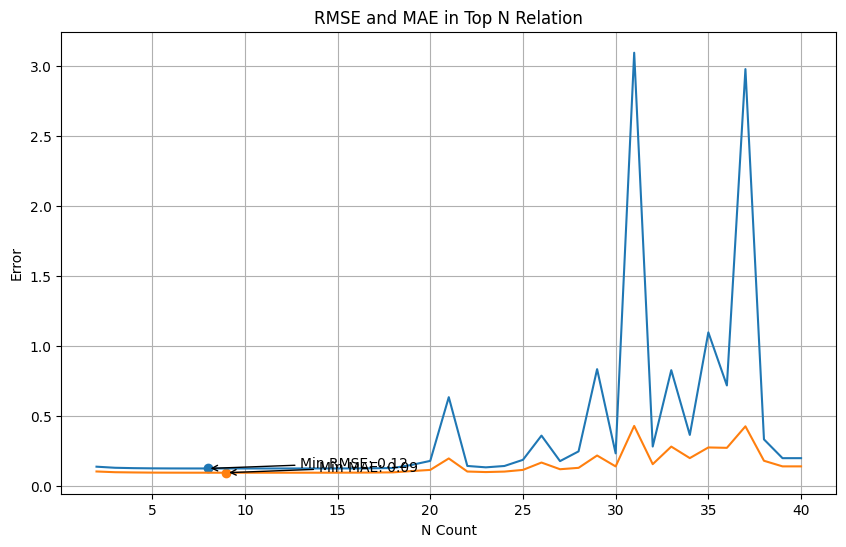

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr2, rmse_user_cs, label='RMSE')
plt.plot(sample_arr2, mae_user_cs, label='MAE')
plt.scatter(sample_arr2[min_rmse_index], rmse_user_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr2[min_mae_index], mae_user_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_user_cs[min_rmse_index]:.2f}',
             xy=(sample_arr2[min_rmse_index], rmse_user_cs[min_rmse_index]),
             xytext=(sample_arr2[min_rmse_index] + 5, rmse_user_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_user_cs[min_mae_index]:.2f}',
             xy=(sample_arr2[min_mae_index], mae_user_cs[min_mae_index]),
             xytext=(sample_arr2[min_mae_index] + 5, mae_user_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 19
df_pred_ub = df_normalized.copy()

# prediksi
for i in range(len(df_pred_ub)):
    # similarity
    # Corrected: Iterate through the columns of df_pred_ub (user names)
    for user_col in df_pred_ub.columns[1:]:
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ub[user_col][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_user_cs, user_col)
            for k in range(len(tmp)):
                if tmp.index[k] != user_col:

                    numerator += ((user_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ub[user_col][i] = average(df_transposed, df_pred_ub['nama film'][i]) + (numerator/denominator)
df_pred_ub

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.460047,0.839764,0.849390,0.849541,0.987879,1.000000,0.770161,0.773513,0.837725,...,0.865288,0.653846,0.845292,0.855266,0.837113,0.842234,0.850443,0.841136,0.860201,0.843276
1,3 Idiots,0.739754,0.771466,0.820926,0.767936,0.771242,0.758346,0.879032,0.715101,0.773341,...,0.789096,0.783904,0.755835,0.766537,0.788837,0.778496,0.761896,0.770884,0.768457,0.770300
2,5 Cowok Jagoan,0.665181,0.761711,0.863115,0.845547,0.801139,0.711694,0.993952,0.783673,0.857636,...,0.850171,0.885196,0.850000,0.851604,0.860381,0.830898,0.848229,0.846003,0.857125,0.849174
3,6 Underground,0.864754,0.824847,0.684040,0.691054,0.632323,0.879032,0.710969,0.746939,0.674324,...,0.713945,0.558704,0.697441,0.689233,0.696787,0.617954,0.681025,0.727569,0.696912,0.687210
4,65,0.893443,0.281059,0.977867,0.560729,0.959596,0.979839,0.741935,0.657143,0.763103,...,0.997951,0.919028,1.000000,0.788501,0.832990,0.707724,0.830266,0.731014,0.818737,0.745810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.760246,0.529574,0.843400,0.255061,0.902208,0.816824,0.884736,0.973247,0.970650,...,0.886353,0.825380,0.732607,0.739220,0.795193,0.814463,0.464213,0.780469,0.796696,0.653580
271,Young Adult,0.703397,0.895915,0.880889,0.882213,0.894832,0.967742,0.937500,0.961224,0.876332,...,0.892063,0.850202,0.864058,0.883672,0.884536,0.872846,0.878569,0.882000,0.870016,0.870321
272,Your Place or Mine,0.778689,0.686333,0.770339,0.710526,0.740496,0.732088,0.852415,0.801321,0.846960,...,0.824065,0.823294,0.664902,0.783056,0.771086,0.839248,0.239264,0.789252,0.781009,0.647147
273,Zodiac,0.799180,0.780814,0.961771,0.831809,0.886081,0.907258,0.826801,0.829592,0.830000,...,0.854443,0.826035,0.824907,0.834246,0.840805,0.827449,0.840487,0.555785,0.840748,0.831924


***SAVING DATAFRAME***

In [ ]:
df_pred_ub.to_excel("ResultCF_UB_CNN-LSTM.xlsx")

In [ ]:
from google.colab import files
files.download("ResultCF_UB_CNN-LSTM.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***EVALUATION***

In [ ]:
df_actualub= df_normalized.copy()
df_predub = pd.read_excel("ResultCF_UB_CNN-LSTM.xlsx")
df_predub = df_predub.drop("Unnamed: 0", axis=1)

df_actual_values = df_actualub.drop(columns='nama film').to_numpy()
df_pred_values = df_predub.drop(columns='nama film').to_numpy()

y_actualub = df_actual_values.flatten()
y_predub = df_pred_values.flatten()

In [ ]:
MAE_ub = mean_absolute_error(y_actualub, y_predub)
MSE_ub = mean_squared_error(y_actualub, y_predub)
rmse_cbf_ub = math.sqrt(MSE_ub)

print("Mean Absolute Error (MAE):", MAE_ub)
print("Root Mean Square Error (RMSE):", rmse_cbf_ub)

Mean Absolute Error (MAE): 0.5976722170993963
Root Mean Square Error (RMSE): 0.7074317250931679


# ***ITEM-BASED***

In [ ]:
item_based_df = df_transposed

for i in range(len(item_based_df)):
    # Corrected: Iterate over the columns of item_based_df (movie names)
    for movie_col in item_based_df.columns:
        if (item_based_df[movie_col][i] != 0):
            # Corrected: Pass item_based_df to the average function and access column names directly
            item_based_df.loc[item_based_df.index[i], movie_col] -= average(item_based_df, movie_col)
item_based_df

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,-0.030246,0.000000,0.174754,0.113443,-0.381393,0.146721,-0.130492,0.034262,0.000000,...,-0.119672,-0.137869,-0.048279,-0.032131,-0.242377,-0.019754,0.000000,0.008689,-0.030820,0.121639
bicaraboxoffice,0.000000,0.000000,-0.088289,0.204847,-0.478941,0.000000,0.000000,-0.294908,0.000000,-0.077556,...,-0.057536,0.052811,-0.063096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.180926,0.000000,0.000000,0.237867,0.000000,0.000000,0.169517,0.000000,0.000000,...,0.052515,0.209698,0.000000,0.000000,0.147203,0.000000,0.000000,0.000000,0.261771,0.233783
ErikDavis,0.000000,0.000000,0.000000,0.000000,-0.149271,0.000000,0.000000,0.184737,0.000000,0.000000,...,0.000000,-0.015668,0.000000,0.000000,0.000000,-0.464939,0.000000,0.000526,0.000000,0.000000
arulfittron,0.137879,0.000000,0.000000,0.072323,0.269596,0.000000,0.132020,0.000000,0.000000,0.193636,...,0.000000,0.000000,0.000000,0.000000,0.228687,0.000000,0.000000,0.000000,0.000000,-0.170808
GilaFilmID,0.260000,0.000000,0.011694,0.379032,0.309839,0.000000,0.000000,0.168629,-0.149677,0.291694,...,0.249274,0.237258,0.239516,0.131210,0.000000,0.000000,0.087742,0.000000,0.327258,0.081774
TarizSolis,0.120161,0.349032,0.403952,0.000000,0.091935,0.000000,0.000000,0.339677,0.006855,0.305161,...,0.178387,0.000000,0.299435,0.000000,0.000000,0.000000,0.137500,0.000000,0.000000,0.156048
djaycoholyc,0.000000,0.000000,0.293673,0.296939,0.027143,-0.207551,0.000000,-0.028980,0.294082,0.287959,...,0.000000,0.255918,0.397347,0.000000,0.321837,0.000000,0.241224,0.000000,0.000000,-0.133265
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.153103,0.000000,0.000000,0.368239,0.000000,0.000000,...,0.000000,0.186646,0.000000,0.000000,0.000000,0.300650,0.000000,0.186960,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,0.428017,0.000000,0.000000,...,0.240579,0.381074,0.000000,0.000000,0.000000,0.198182,0.000000,0.183388,0.000000,0.000000


## ***Cosine Similarity***

In [ ]:
# mengambil kolom dengan nilai-nilai rating
rating_matrix1 = item_based_df.iloc[:, 1:]
sim_item = cosine_similarity(rating_matrix1.T)

sim_item_cs = pd.DataFrame(sim_item, index=item_based_df.iloc[:, 1:].columns, columns=item_based_df.iloc[:, 1:].columns)
sim_item_cs

nama film,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,AKA,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
nama film,,,,,,,,,,,,,,,,,,,,,
3 Idiots,1.000000,0.200833,0.056447,0.044462,0.103688,-0.035364,0.334013,0.001663,0.259568,0.264573,...,0.108759,0.139366,0.233510,0.192773,0.111091,0.083723,0.245651,0.004811,0.274257,0.344965
5 Cowok Jagoan,0.200833,1.000000,0.291630,0.252280,0.147774,0.000000,0.299657,0.423283,0.240440,0.082867,...,0.056420,0.285012,0.378541,0.001568,0.386499,0.000000,0.127275,0.217173,0.005224,0.018882
6 Underground,0.056447,0.291630,1.000000,0.271559,-0.036384,0.321455,0.033792,0.276173,0.326199,0.284698,...,0.164495,0.328003,0.135975,0.366405,0.253297,-0.032776,0.273474,0.159422,0.646208,0.196189
65,0.044462,0.252280,0.271559,1.000000,0.287589,0.187762,0.216872,0.153952,0.249502,0.732033,...,0.551793,0.574630,0.175340,0.429559,0.385182,0.344301,0.321405,0.331262,0.190926,0.413259
A Classic Horror Story,0.103688,0.147774,-0.036384,0.287589,1.000000,-0.091718,0.380160,-0.060026,0.319557,0.381906,...,0.296755,0.300170,0.371439,0.349941,0.365057,0.277764,0.442170,-0.002200,0.012744,0.150431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.083723,0.000000,-0.032776,0.344301,0.277764,-0.034698,0.400530,-0.000424,0.134314,0.410414,...,0.317762,0.339271,0.307152,0.095212,0.082390,1.000000,0.266365,0.266320,0.000510,0.116112
Young Adult,0.245651,0.127275,0.273474,0.321405,0.442170,0.062616,0.382201,0.050517,0.475166,0.432594,...,0.327329,0.596767,0.518699,0.503511,0.208857,0.266365,1.000000,0.003986,0.186209,0.330297
Your Place or Mine,0.004811,0.217173,0.159422,0.331262,-0.002200,0.001141,0.440177,0.628611,0.136624,0.367241,...,0.245407,0.282762,0.194990,0.003469,0.360792,0.266320,0.003986,1.000000,0.006368,0.457486


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil ***cosine similarity***

In [ ]:
def cek_topN(movie_title):
    print('Film yang mirip dengan "{}" adalah:\n'.format(movie_title))

    # mengurutkan film berdasarkan similarity
    similar_movies = sim_item_cs.sort_values(by=movie_title, ascending=False).index[1:11]

    for rank, similar_movie in enumerate(similar_movies, start=1):
        # nilai similarity
        similarity_score = sim_item_cs.loc[similar_movie, movie_title]
        print("No. {}: Film {} (Score: {:.4f})".format(rank, similar_movie, similarity_score))

In [ ]:
movies = "Merantau"
cek_topN(movies)

Film yang mirip dengan "Merantau" adalah:

No. 1: Film Over the Moon (Score: 0.8967)
No. 2: Film The Princess and the Frog (Score: 0.8202)
No. 3: Film Clash of the Titans (Score: 0.8112)
No. 4: Film Left Behind (Score: 0.8046)
No. 5: Film Surga Yang Tak Dirindukan (Score: 0.7721)
No. 6: Film Superman Returns (Score: 0.7622)
No. 7: Film American Ultra (Score: 0.7378)
No. 8: Film Mariposa (Score: 0.7234)
No. 9: Film Ghost Rider (Score: 0.7197)
No. 10: Film The Disaster Artist (Score: 0.7114)


## ***FIND OPTIMAL $N$***

In [ ]:
sample_arr1 = np.empty([0])
rmse_item_cs = np.empty([0])
mae_item_cs = np.empty([0])

rating_df = df_transposed.copy()
original_df = df_transposed.copy()

# iterasi sampel n
for n in range(2, 51):
    sample = n

    # iterasi rows and columns
    for i in range(len(rating_df)):
        for j in range(len(sim_item_cs)):
            # Get the movie name from the columns of sim_item_cs
            movie_col_name = sim_item_cs.columns[j]

            if rating_df[movie_col_name][i] != 0:
                numerator = 0
                denominator = 0
                tmp = top_n(sample, sim_item_cs, movie_col_name)

                # iterasi top similar items
                for k in range(len(tmp)):
                    if tmp.index[k] != movie_col_name:
                        numerator += (item_based_df[tmp.index[k]][i] * tmp.iloc[k])
                        denominator += tmp.iloc[k]

                # update rating collaborative filtering
                if denominator != 0:
                    # Pass the transposed dataframe and the movie name to the average function
                    rating_df[movie_col_name][i] = average(df_transposed, movie_col_name) + (numerator / denominator)

    # inisialisasi array (perbandingan)
    original_df.head()
    original_rating = np.array([])
    predicted_rating = np.array([])

    # Corrected: Iterate over the columns of rating_df (movie names)
    for movie_col_name in rating_df.columns:
        # Iterate over the index of rating_df (user names)
        for user_index in range(len(rating_df)):
            if rating_df[movie_col_name][user_index] != 0:
                predicted_rating = np.append(predicted_rating, float(rating_df[movie_col_name][user_index]))
                # Access the original rating from original_df using user index and movie column name
                original_rating = np.append(original_rating, float(original_df[movie_col_name][user_index]))


    # evaluasi
    rmse_item_cs = np.append(rmse_item_cs, round(math.sqrt(mean_squared_error(predicted_rating, original_rating)), 4))
    mae_item_cs = np.append(mae_item_cs, round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr1 = np.append(sample_arr1, sample)

In [ ]:
for i in range(len(sample_arr1)):
    print(f"Nilai N: {sample_arr1[i]}, RMSE: {rmse_item_cs[i]}, MAE: {mae_item_cs[i]}")

Nilai N: 2.0, RMSE: 0.2993, MAE: 0.2586
Nilai N: 3.0, RMSE: 0.2768, MAE: 0.2378
Nilai N: 4.0, RMSE: 0.2685, MAE: 0.2318
Nilai N: 5.0, RMSE: 0.2631, MAE: 0.2276
Nilai N: 6.0, RMSE: 0.2588, MAE: 0.2238
Nilai N: 7.0, RMSE: 0.2571, MAE: 0.222
Nilai N: 8.0, RMSE: 0.2549, MAE: 0.2199
Nilai N: 9.0, RMSE: 0.2528, MAE: 0.2175
Nilai N: 10.0, RMSE: 0.2515, MAE: 0.2162
Nilai N: 11.0, RMSE: 0.25, MAE: 0.2145
Nilai N: 12.0, RMSE: 0.2492, MAE: 0.2137
Nilai N: 13.0, RMSE: 0.248, MAE: 0.2121
Nilai N: 14.0, RMSE: 0.2469, MAE: 0.2107
Nilai N: 15.0, RMSE: 0.2457, MAE: 0.2094
Nilai N: 16.0, RMSE: 0.2448, MAE: 0.2085
Nilai N: 17.0, RMSE: 0.2441, MAE: 0.2074
Nilai N: 18.0, RMSE: 0.2432, MAE: 0.2063
Nilai N: 19.0, RMSE: 0.2426, MAE: 0.2054
Nilai N: 20.0, RMSE: 0.2417, MAE: 0.2042
Nilai N: 21.0, RMSE: 0.241, MAE: 0.2033
Nilai N: 22.0, RMSE: 0.2402, MAE: 0.2024
Nilai N: 23.0, RMSE: 0.2395, MAE: 0.2015
Nilai N: 24.0, RMSE: 0.2388, MAE: 0.2006
Nilai N: 25.0, RMSE: 0.2383, MAE: 0.1997
Nilai N: 26.0, RMSE: 0.2378, 

In [ ]:
min_rmse_index = np.argmin(rmse_item_cs)
min_mae_index = np.argmin(mae_item_cs)

print(f"Pada nilai N = {sample_arr1[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_item_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_item_cs[min_mae_index]}")

Pada nilai N = 50.0, mendapatkan:
   - Nilai RMSE minimum = 0.2294
   - Nilai MAE minimum  = 0.1874


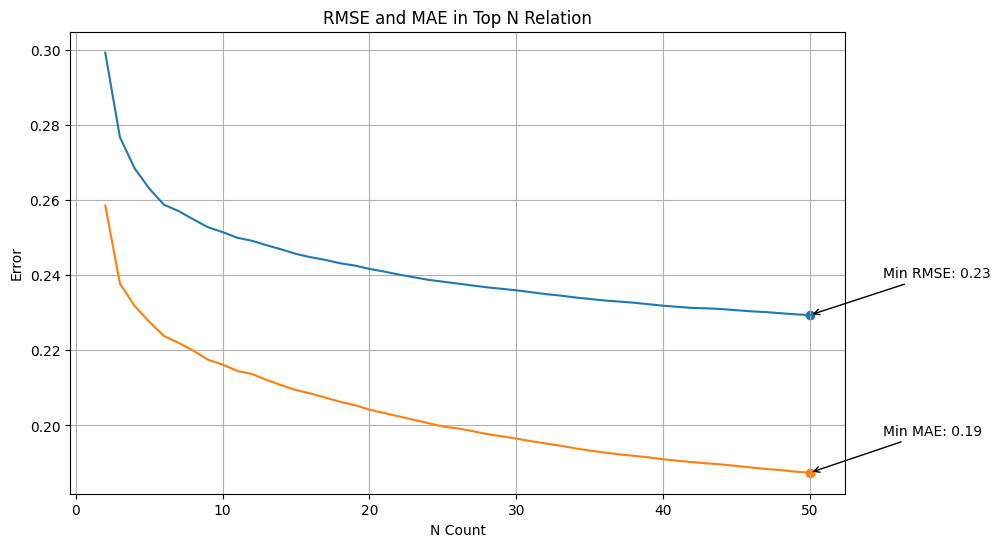

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr1, rmse_item_cs, label='RMSE')
plt.plot(sample_arr1, mae_item_cs, label='MAE')
plt.scatter(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr1[min_mae_index], mae_item_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_item_cs[min_rmse_index]:.2f}',
             xy=(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index]),
             xytext=(sample_arr1[min_rmse_index] + 5, rmse_item_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_item_cs[min_mae_index]:.2f}',
             xy=(sample_arr1[min_mae_index], mae_item_cs[min_mae_index]),
             xytext=(sample_arr1[min_mae_index] + 5, mae_item_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 9
df_pred_ib = df_transposed.copy()

# prediksi
for i in range(len(df_pred_ib)):
    # similarity
    for j in range(len(sim_item_cs)):
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ib[sim_item_cs.index[j]][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_item_cs, sim_item_cs.index[j])
            for k in range(len(tmp)):
                if tmp.index[k] != sim_item_cs.index[j]:

                    numerator += ((item_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ib[sim_item_cs.index[j]][i] = average(df_transposed, sim_item_cs.index[j]) + (numerator/denominator)
df_pred_ib

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,-0.030246,0.261710,0.174754,0.113443,-0.381393,0.146721,-0.130492,0.034262,0.307434,...,-0.119672,-0.137869,-0.048279,-0.032131,-0.242377,-0.019754,0.245598,0.008689,-0.030820,0.121639
bicaraboxoffice,0.000000,0.270545,-0.088289,0.204847,-0.478941,0.219434,0.307267,-0.294908,0.276764,-0.077556,...,-0.057536,0.052811,-0.063096,0.304871,0.313010,0.307831,0.332386,0.256898,0.349774,0.259571
WatchmenID,0.000000,0.180926,0.344081,0.326973,0.237867,0.359995,0.289653,0.169517,0.297193,0.344471,...,0.052515,0.209698,0.409866,0.324561,0.147203,0.350149,0.310000,0.273946,0.261771,0.233783
ErikDavis,0.000000,0.274745,0.280000,0.240000,-0.149271,0.250000,0.270000,0.184737,0.280066,0.300000,...,0.342523,-0.015668,0.300000,0.300000,0.280000,-0.464939,0.310000,0.000526,0.280000,0.305615
arulfittron,0.137879,0.309556,0.292247,0.072323,0.269596,0.295788,0.132020,0.365534,0.361605,0.193636,...,0.368957,0.346482,0.321708,0.339912,0.228687,0.326735,0.417424,0.299826,0.287036,-0.170808
GilaFilmID,0.260000,0.328122,0.011694,0.379032,0.309839,0.314182,0.259917,0.168629,-0.149677,0.291694,...,0.249274,0.237258,0.239516,0.131210,0.383734,0.333340,0.087742,0.345543,0.327258,0.081774
TarizSolis,0.120161,0.349032,0.403952,0.261457,0.091935,0.250000,0.255377,0.339677,0.006855,0.305161,...,0.178387,0.430982,0.299435,0.405963,0.400379,0.286722,0.137500,0.352270,0.265242,0.156048
djaycoholyc,0.000000,0.388539,0.293673,0.296939,0.027143,-0.207551,0.359872,-0.028980,0.294082,0.287959,...,0.367206,0.255918,0.397347,0.390327,0.321837,0.312964,0.241224,0.330408,0.441942,-0.133265
akstanwyck,0.000000,0.268370,0.280000,0.240000,0.153103,0.250000,0.270000,0.368239,0.303293,0.300000,...,0.476508,0.186646,0.300000,0.300000,0.280000,0.300650,0.310000,0.186960,0.280000,0.308351
slashfilm,0.000000,0.291434,0.280000,0.240000,0.160000,0.251871,0.270000,0.428017,0.302848,0.300000,...,0.240579,0.381074,0.314227,0.300000,0.280000,0.198182,0.310000,0.183388,0.280000,0.332677


***SAVING DATAFRAME***

In [ ]:
df_pred_ib.to_excel("ResultCF_IB_CNN-LSTM.xlsx")

In [ ]:
files.download("ResultCF_IB_CNN-LSTM.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***EVALUATION***

In [ ]:
df_actualib = df_transposed.copy()
df_predib = pd.read_excel("ResultCF_IB_CNN-LSTM.xlsx")
df_predib.rename(columns={'Unnamed: 0': 'nama film'}, inplace=True)

df_actual_values = df_actualib.to_numpy()
df_pred_values = df_predib.drop(columns='nama film').to_numpy()

y_actualib = df_actual_values.flatten()
y_predib = df_pred_values.flatten()

In [ ]:
MAE_ib = mean_absolute_error(y_actualib, y_predib)
MSE_ib = mean_squared_error(y_actualib, y_predib)
rmse_cbf_ib = math.sqrt(MSE_ib)

print("Mean Absolute Error (MAE):", MAE_ib)
print("Root Mean Square Error (RMSE):", rmse_cbf_ib)

Mean Absolute Error (MAE): 0.23420372309165935
Root Mean Square Error (RMSE): 0.28323342610071583
